In [24]:
import numpy as np
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

import warnings
warnings.filterwarnings("ignore")

## Features João

### Divisão aleatória


# Dataset: Original
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4182
F1-Score - Teste: 0.3653
----------------------------------------


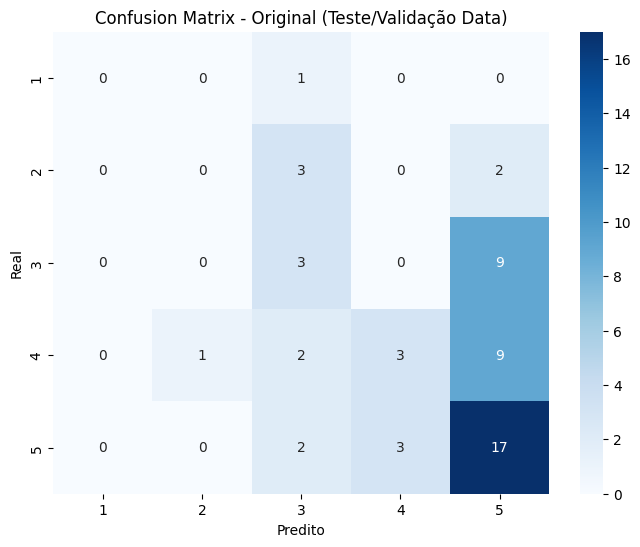

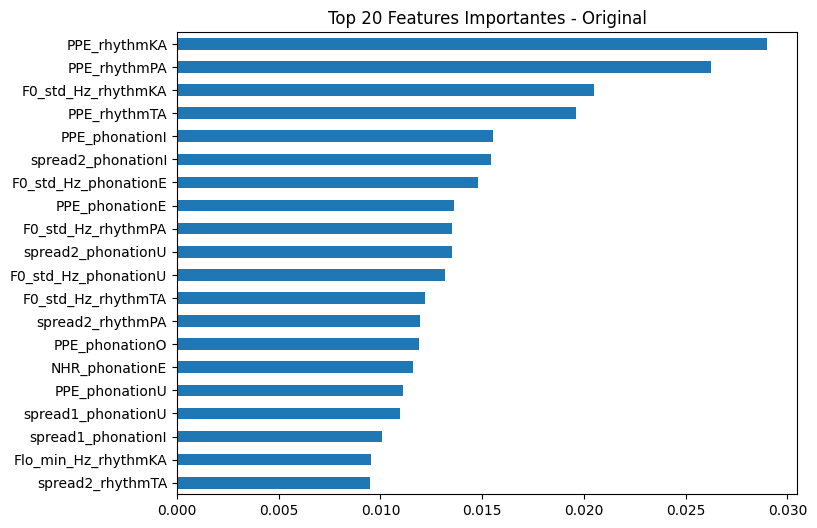


# Dataset: Z-Score
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4182
F1-Score - Teste: 0.3653
----------------------------------------


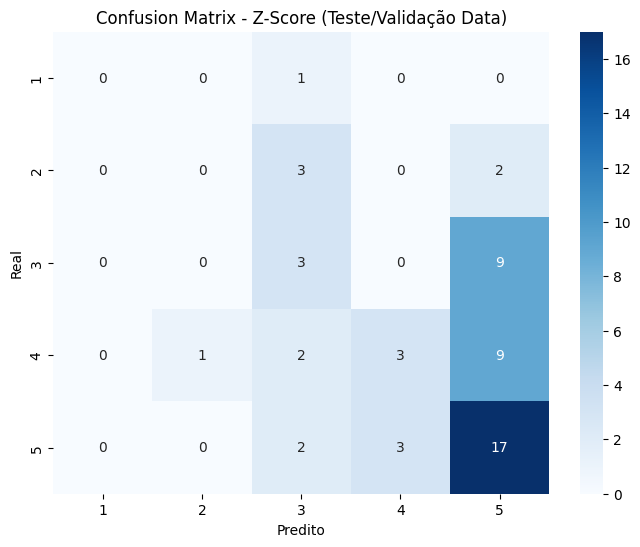

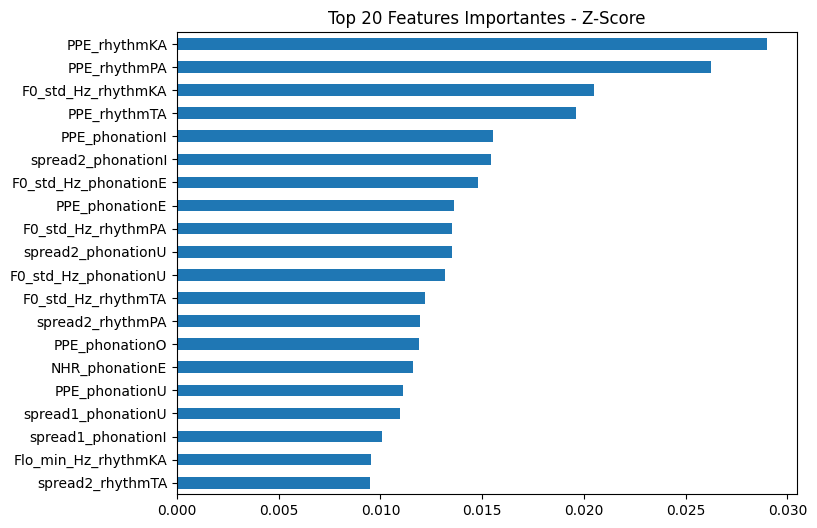


# Dataset: Min-Max
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4182
F1-Score - Teste: 0.3653
----------------------------------------


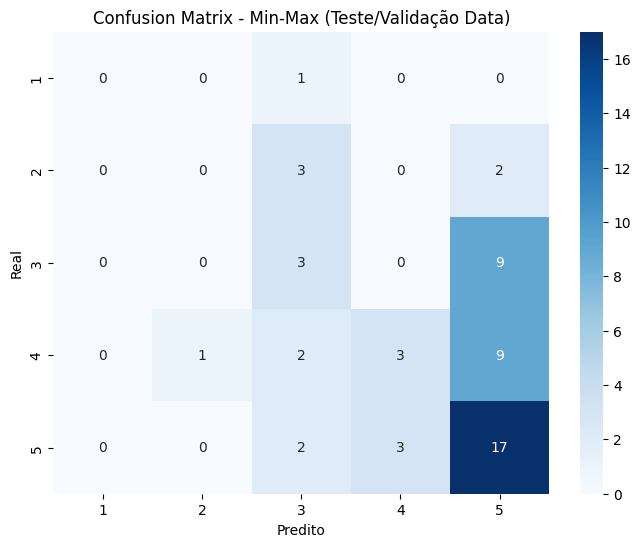

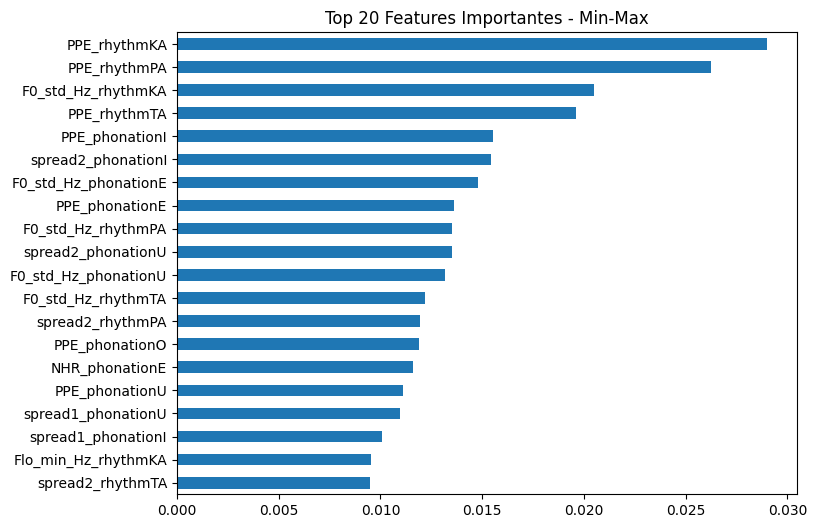


# Dataset: SN Min-Max
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4182
F1-Score - Teste: 0.3653
----------------------------------------


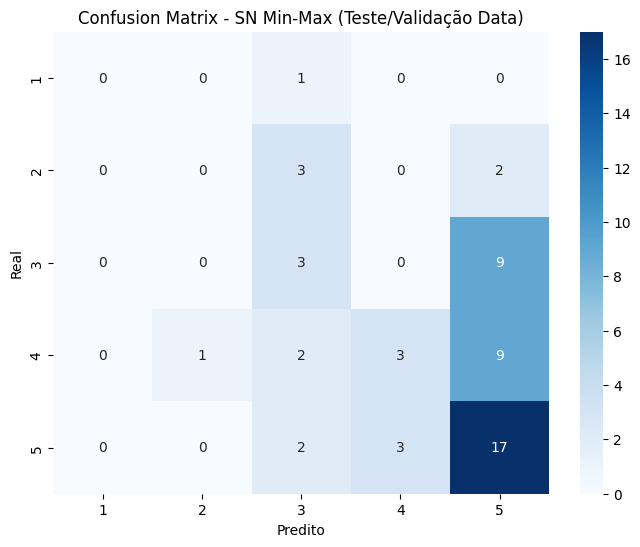

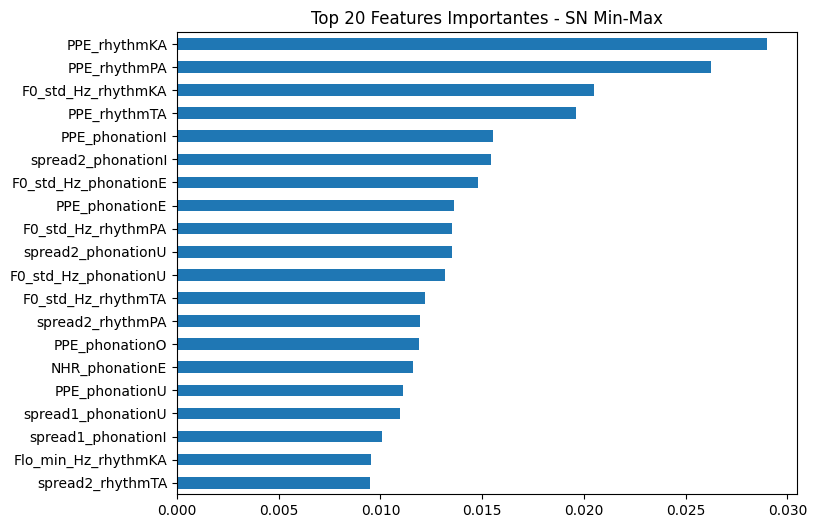


# Dataset: SN Z-Score
----------------------------------------
Performance Metrics (Treino 80% -> Teste 20%):
Accuracy - Teste: 0.4182
F1-Score - Teste: 0.3653
----------------------------------------


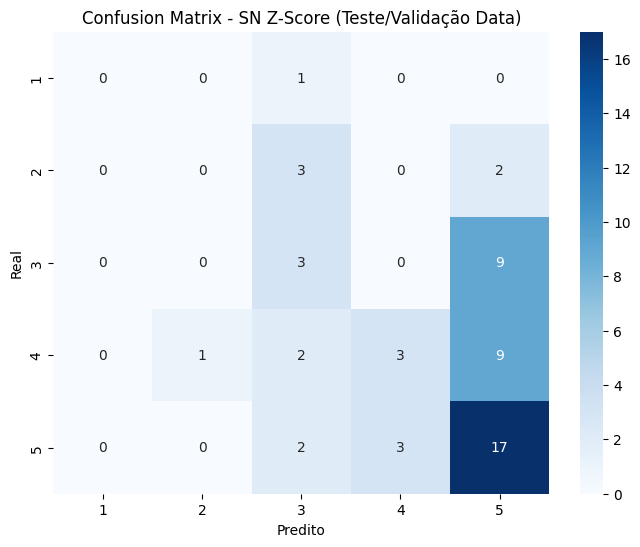

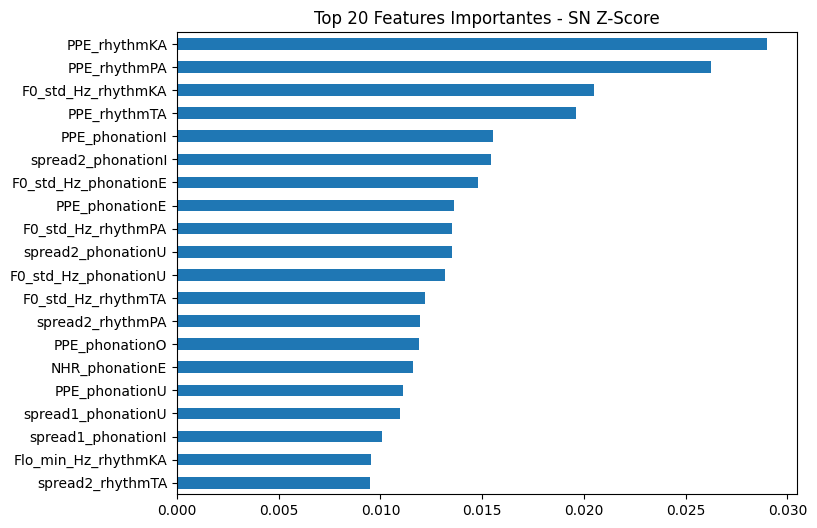

In [14]:
train_file_paths = {
    'Original': r'..\data\task1\features\train\features_raw.csv',
    'Z-Score': r'..\data\task1\features\train\features_z_score.csv',
    'Min-Max': r'..\data\task1\features\train\features_min_max_0_1.csv',
    'SN Min-Max': r'..\data\task1\features\train\features_signal_norm_-1_1_min_max_0_1.csv',
    'SN Z-Score': r'..\data\task1\features\train\features_signal_norm_-1_1_z_score.csv',
}

rf_params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

TEST_SIZE_PERCENTAGE = 0.2 
META_COLUMNS = ['ID', 'Class']
results = []

for name, train_path in train_file_paths.items():
    print(f'\n# Dataset: {name}')
    
    try:
        df_train_full = pd.read_csv(train_path)
    except FileNotFoundError:
        print(f'ERRO: Arquivo(s) não encontrado(s) para o dataset "{name}". Por favor, verifique o caminho: {train_path}. Pulando...')
        continue

    df_train_full['Sex'] = df_train_full['Sex'].map({'M': 0, 'F': 1})
    
    X_full_orig = df_train_full.drop(columns=META_COLUMNS)
    y_full = df_train_full['Class']

    X_train_orig, X_test_orig, y_train, y_test = train_test_split(
        X_full_orig, y_full, test_size=TEST_SIZE_PERCENTAGE, stratify=y_full, random_state=42
    )
    
    if 'Original' in name:
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train_orig)
        X_test_processed = scaler.transform(X_test_orig)
    else:
        X_train_processed = X_train_orig.values
        X_test_processed = X_test_orig.values

    rf = RandomForestClassifier(**rf_params)
    rf.fit(X_train_processed, y_train)
    y_test_pred = rf.predict(X_test_processed)
    
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print('-' * 40)
    print('Performance Metrics (Treino 80% -> Teste 20%):')
    print(f'Accuracy - Teste: {acc_test:.4f}')
    print(f'F1-Score - Teste: {f1_test:.4f}')
    print('-' * 40)
    
    results.append({
        'Dataset': name,
        'Accuracy': acc_test,
        'F1-Score': f1_test
    })

    cm = confusion_matrix(y_test, y_test_pred)
    labels = sorted(y_full.unique()) 
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Confusion Matrix - {name} (Teste/Validação Data)')
    plt.show()

    importances = pd.Series(rf.feature_importances_, index=X_train_orig.columns)
    plt.figure(figsize=(8, 6))
    importances.nlargest(20).sort_values().plot(kind='barh')
    plt.title(f'Top 20 Features Importantes - {name}')
    plt.show()

### IDs do Baseline


# Dataset: Original
Tamanho do Treino: 219 amostras
Tamanho do Teste/Validação (IDs fixos): 53 amostras
----------------------------------------
Performance Metrics (Treino $\rightarrow$ Teste Fixo):
Accuracy - Teste: 0.5094
F1-Score - Teste: 0.4598
----------------------------------------


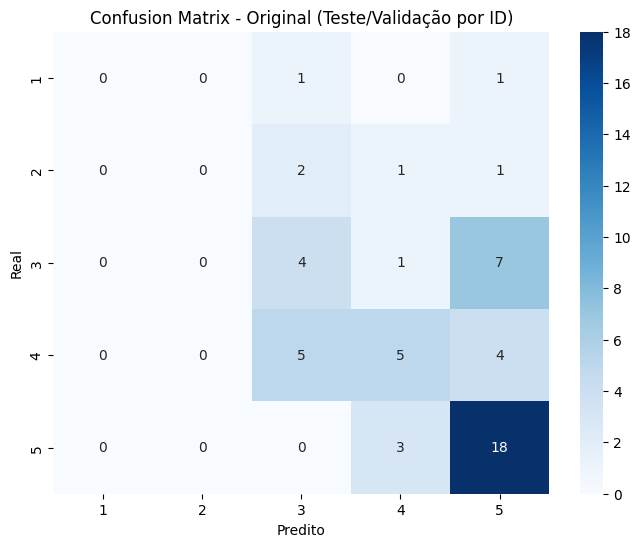

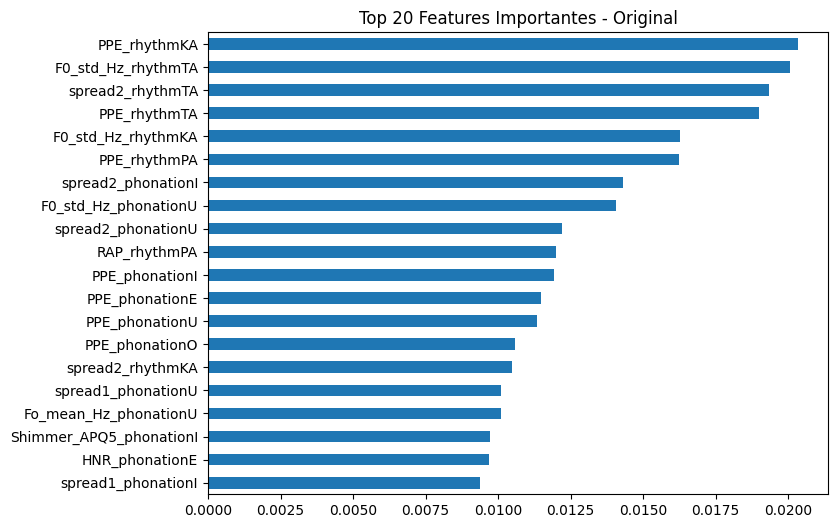


# Dataset: Z-Score
Tamanho do Treino: 219 amostras
Tamanho do Teste/Validação (IDs fixos): 53 amostras
----------------------------------------
Performance Metrics (Treino $\rightarrow$ Teste Fixo):
Accuracy - Teste: 0.5283
F1-Score - Teste: 0.4933
----------------------------------------


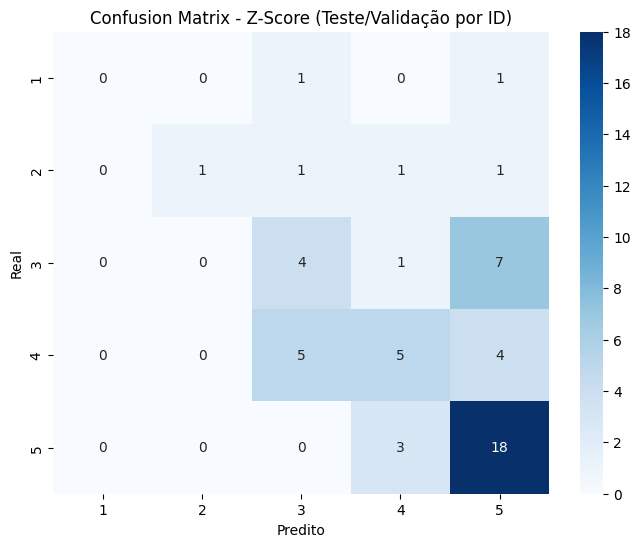

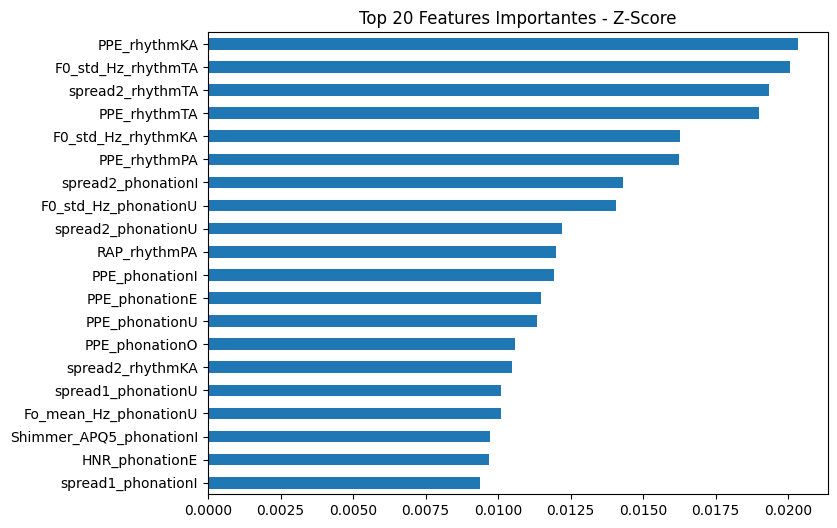


# Dataset: Min-Max
Tamanho do Treino: 219 amostras
Tamanho do Teste/Validação (IDs fixos): 53 amostras
----------------------------------------
Performance Metrics (Treino $\rightarrow$ Teste Fixo):
Accuracy - Teste: 0.5283
F1-Score - Teste: 0.4933
----------------------------------------


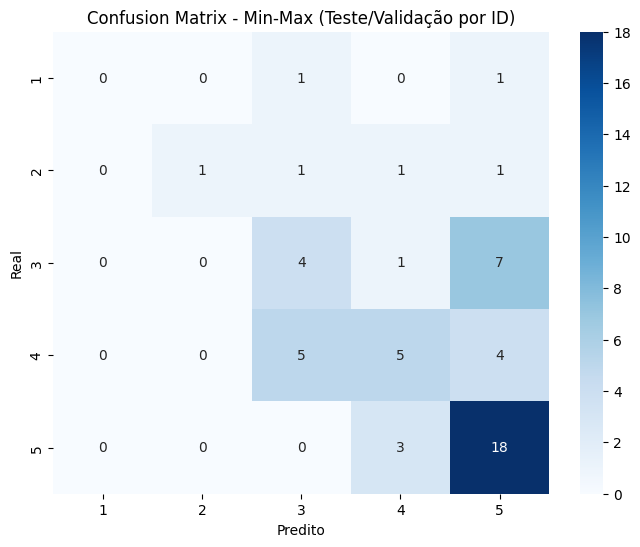

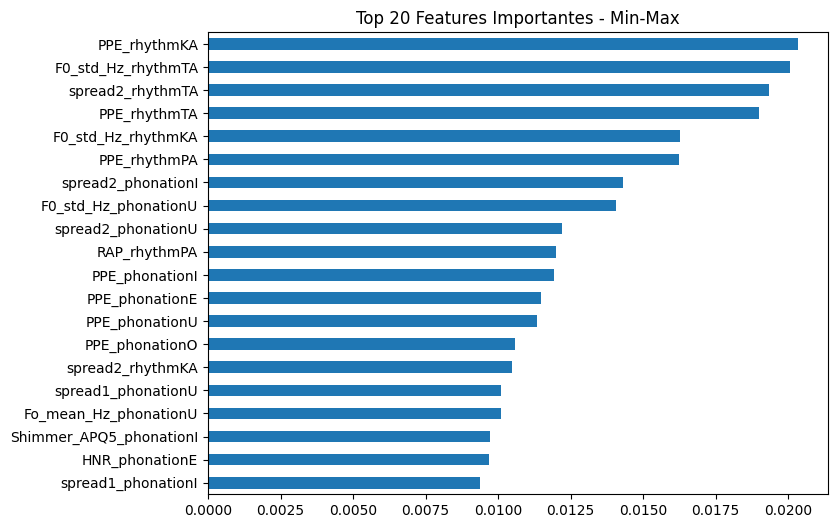


# Dataset: SN Min-Max
Tamanho do Treino: 219 amostras
Tamanho do Teste/Validação (IDs fixos): 53 amostras
----------------------------------------
Performance Metrics (Treino $\rightarrow$ Teste Fixo):
Accuracy - Teste: 0.5283
F1-Score - Teste: 0.4933
----------------------------------------


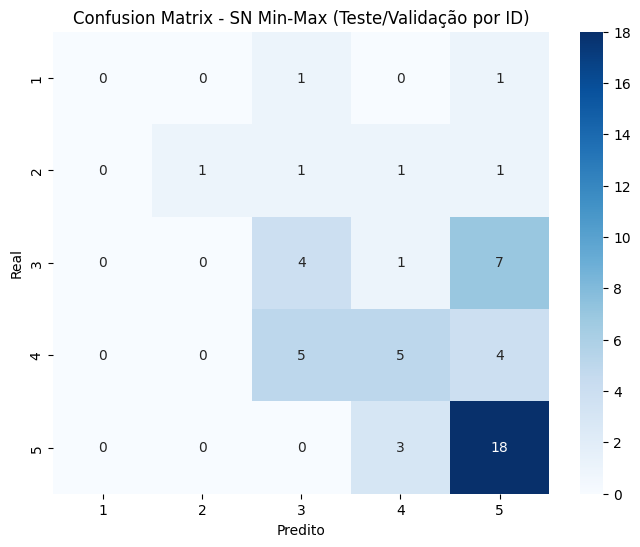

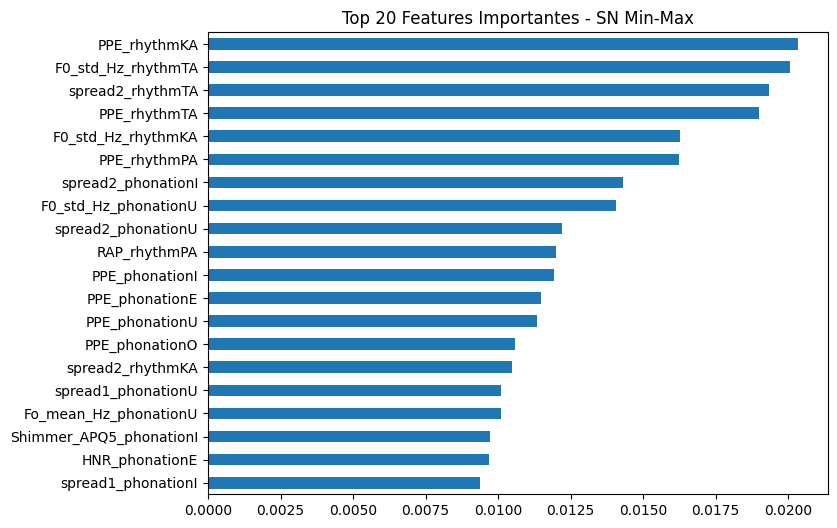


# Dataset: SN Z-Score
Tamanho do Treino: 219 amostras
Tamanho do Teste/Validação (IDs fixos): 53 amostras
----------------------------------------
Performance Metrics (Treino $\rightarrow$ Teste Fixo):
Accuracy - Teste: 0.5283
F1-Score - Teste: 0.4933
----------------------------------------


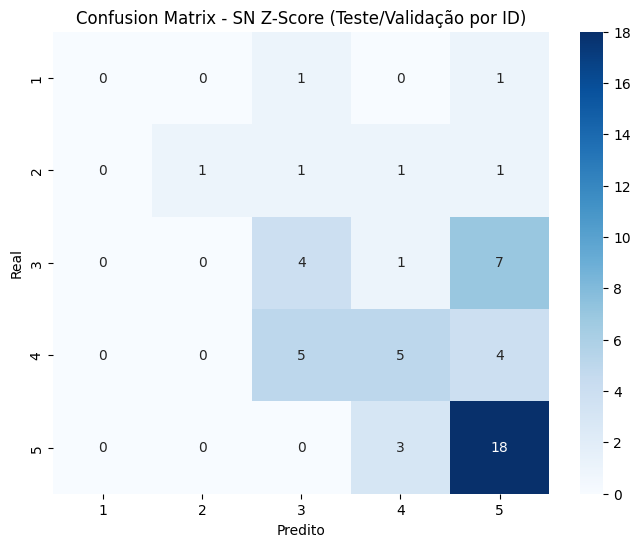

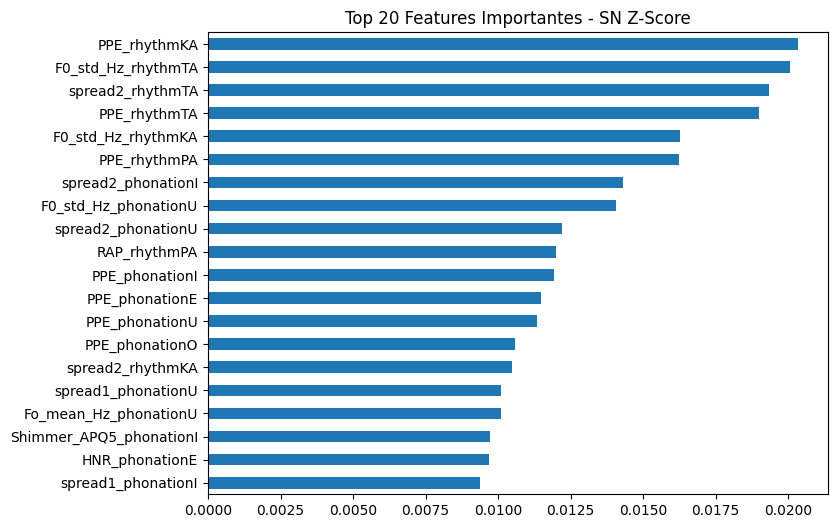

In [16]:
test_ids = [
    "ID007","ID012","ID021","ID029","ID037","ID046","ID051","ID053","ID054","ID056",
    "ID063","ID075","ID083","ID090","ID099","ID101","ID105","ID110","ID116","ID122",
    "ID129","ID136","ID138","ID140","ID158","ID160","ID164","ID171","ID176","ID179",
    "ID202","ID209","ID227","ID229","ID233","ID245","ID252","ID253","ID260","ID261",
    "ID263","ID264","ID269","ID270","ID274","ID278","ID284","ID286","ID290","ID302",
    "ID306","ID323","ID329"
]

train_file_paths = {
    'Original': r'..\data\task1\features\train\features_raw.csv',
    'Z-Score': r'..\data\task1\features\train\features_z_score.csv',
    'Min-Max': r'..\data\task1\features\train\features_min_max_0_1.csv',
    'SN Min-Max': r'..\data\task1\features\train\features_signal_norm_-1_1_min_max_0_1.csv',
    'SN Z-Score': r'..\data\task1\features\train\features_signal_norm_-1_1_z_score.csv',
}

rf_params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

META_COLUMNS = ['ID', 'Class']

results = []

for name, train_path in train_file_paths.items():
    print(f'\n# Dataset: {name}')
    
    try:
        # Carregar Dados de Treino (base rotulada)
        df_full = pd.read_csv(train_path)
    except FileNotFoundError:
        print(f'ERRO: Arquivo(s) não encontrado(s) para o dataset "{name}". Por favor, verifique o caminho: {train_path}. Pulando...')
        continue

    # Preparação dos dados: Mapeamento
    df_full['Sex'] = df_full['Sex'].map({'M': 0, 'F': 1})
    
    # Separação dos Dados (Baseada em ID)
    df_test_val = df_full[df_full['ID'].isin(test_ids)].copy()
    df_train = df_full[~df_full['ID'].isin(test_ids)].copy()

    # Separa Features (X) e Target (y), removendo 'ID' e 'Class' das features
    X_train_orig = df_train.drop(columns=META_COLUMNS)
    y_train = df_train['Class']
    X_test_orig = df_test_val.drop(columns=META_COLUMNS)
    y_test = df_test_val['Class']
    
    # Exibe o tamanho dos conjuntos
    print(f'Tamanho do Treino: {len(df_train)} amostras')
    print(f'Tamanho do Teste/Validação (IDs fixos): {len(df_test_val)} amostras')


    # Normalização (se necessário) - Aplicada APENAS nas features
    if 'Original' in name:
        scaler = StandardScaler()
        X_train_processed = scaler.fit_transform(X_train_orig)
        X_test_processed = scaler.transform(X_test_orig)
    else:
        X_train_processed = X_train_orig.values
        X_test_processed = X_test_orig.values

    # Treinamento do Modelo
    rf = RandomForestClassifier(**rf_params)
    rf.fit(X_train_processed, y_train)

    # Avaliação do Modelo (no conjunto de Teste/Validação)
    y_test_pred = rf.predict(X_test_processed)
    
    # Cálculo de Métricas
    acc_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    print('-' * 40)
    print('Performance Metrics (Treino $\\rightarrow$ Teste Fixo):')
    print(f'Accuracy - Teste: {acc_test:.4f}')
    print(f'F1-Score - Teste: {f1_test:.4f}')
    print('-' * 40)
    
    results.append({
        'Dataset': name,
        'Accuracy': acc_test,
        'F1-Score': f1_test
    })

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_test_pred)
    labels = sorted(df_full['Class'].unique()) 
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title(f'Confusion Matrix - {name} (Teste/Validação por ID)')
    plt.show()

    # Importância de Features
    importances = pd.Series(rf.feature_importances_, index=X_train_orig.columns)
    plt.figure(figsize=(8, 6))
    importances.nlargest(20).sort_values().plot(kind='barh')
    plt.title(f'Top 20 Features Importantes - {name}')
    plt.show()

# Features do Thiago

In [19]:
df = pd.read_csv(r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\data\task1\features\train\features_thiago.csv')

id_vars = ['ID', 'Age', 'Sex', 'Class']
pivot_col = 'Audio Type'
value_cols = [col for col in df.columns if col not in id_vars + [pivot_col]]

df_pivot = df.set_index(id_vars + [pivot_col])[value_cols].unstack(level=pivot_col)
df_pivot.columns = ['{}_{}'.format(feature, audio_type) for feature, audio_type in df_pivot.columns]
df_pivot = df_pivot.reset_index()
df_pivot = df_pivot.dropna(axis=1, how='all')

print("\nColunas removidas se estavam 100% nulas.")
print(f"Shape final: {df_pivot.shape}")
print("\nExemplo de colunas resultantes:")
print(df_pivot.columns[:10].tolist())

output_path = r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\data\task1\features\train\features_thiago_pivot.csv'
df_pivot.to_csv(output_path, index=False)


✅ Colunas removidas se estavam 100% nulas.
Shape final: (272, 435)

Exemplo de colunas resultantes:
['ID', 'Age', 'Sex', 'Class', 'duration_phonationA', 'duration_phonationE', 'duration_phonationI', 'duration_phonationO', 'duration_phonationU', 'duration_rhythmKA']


### Divisão aleatória


# Carregando dataset...
Convertendo colunas com arrays: counts_rhythmKA
Convertendo colunas com arrays: counts_rhythmPA
Convertendo colunas com arrays: counts_rhythmTA
Convertendo colunas com arrays: peaks_rhythmKA
Convertendo colunas com arrays: peaks_rhythmPA
Convertendo colunas com arrays: peaks_rhythmTA
----------------------------------------
Modelo: Random Forest Classifier (Split 80/20)
Accuracy - Teste: 0.5455
F1-Score - Teste: 0.4981
----------------------------------------


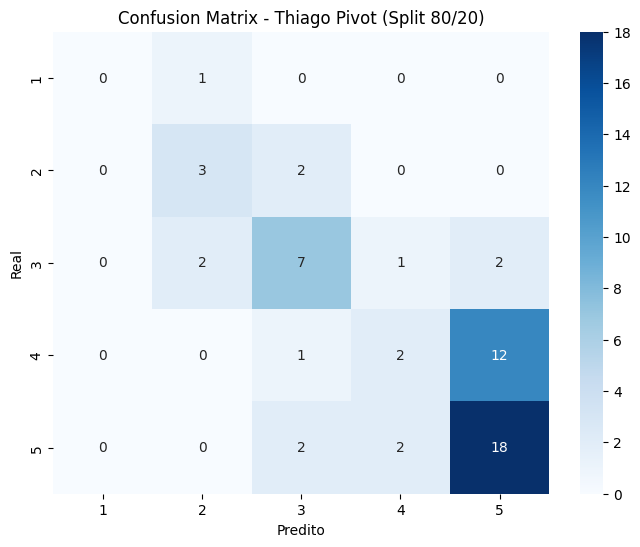

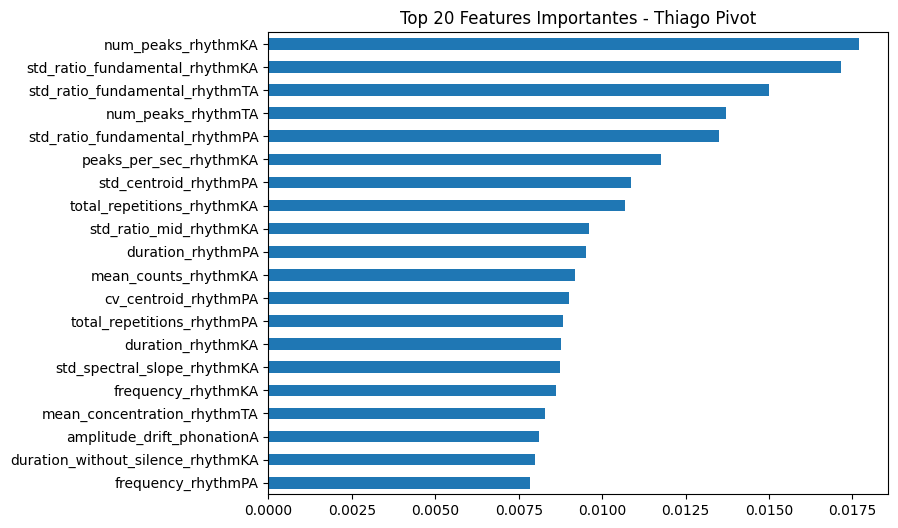

In [28]:
train_file_path = r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\data\task1\features\train\features_thiago_pivot.csv'

rf_params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

TEST_SIZE_PERCENTAGE = 0.2
META_COLUMNS = ['ID', 'Class']

print(f'\n# Carregando dataset...')
df_train_full = pd.read_csv(train_file_path)

if 'Sex' in df_train_full.columns:
    df_train_full['Sex'] = df_train_full['Sex'].map({'M': 0, 'F': 1})

df_train_full = df_train_full.dropna(axis=1, how='all')

def try_parse_array(x):
    try:
        val = literal_eval(x) if isinstance(x, str) and x.startswith('[') else x
        if isinstance(val, (list, tuple, np.ndarray)):
            return np.mean(val)
        return val
    except Exception:
        return x

for col in df_train_full.columns:
    if df_train_full[col].astype(str).str.startswith('[').any():
        print(f'Convertendo colunas com arrays: {col}')
        df_train_full[col] = df_train_full[col].apply(try_parse_array)

X_full_orig = df_train_full.drop(columns=META_COLUMNS)
y_full = df_train_full['Class']
X_full_orig = X_full_orig.select_dtypes(include=[np.number])

X_train_orig, X_test_orig, y_train, y_test = train_test_split(
    X_full_orig, y_full, test_size=TEST_SIZE_PERCENTAGE, stratify=y_full, random_state=42
)

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_orig)
X_test_processed = scaler.transform(X_test_orig)

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_processed, y_train)

y_test_pred = rf.predict(X_test_processed)
acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print('-' * 40)
print('Modelo: Random Forest Classifier (Split 80/20)')
print(f'Accuracy - Teste: {acc_test:.4f}')
print(f'F1-Score - Teste: {f1_test:.4f}')
print('-' * 40)

cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(y_full.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title(f'Confusion Matrix - Thiago Pivot (Split 80/20)')
plt.show()

importances = pd.Series(rf.feature_importances_, index=X_train_orig.columns)
plt.figure(figsize=(8, 6))
importances.nlargest(20).sort_values().plot(kind='barh')
plt.title('Top 20 Features Importantes - Thiago Pivot')
plt.show()

### IDs do Baseline


# Carregando dataset...
Convertendo coluna com arrays: counts_rhythmKA
Convertendo coluna com arrays: counts_rhythmPA
Convertendo coluna com arrays: counts_rhythmTA
Convertendo coluna com arrays: peaks_rhythmKA
Convertendo coluna com arrays: peaks_rhythmPA
Convertendo coluna com arrays: peaks_rhythmTA
Total treino: 219 | teste: 53
----------------------------------------
Accuracy - Teste: 0.6038
F1-Score - Teste: 0.5706
----------------------------------------


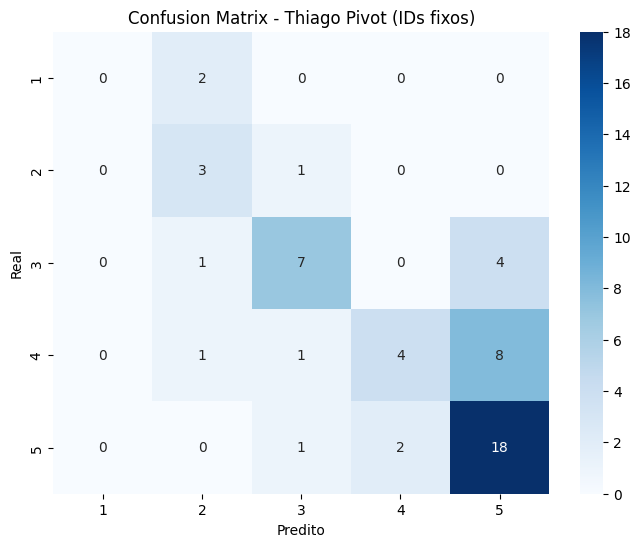

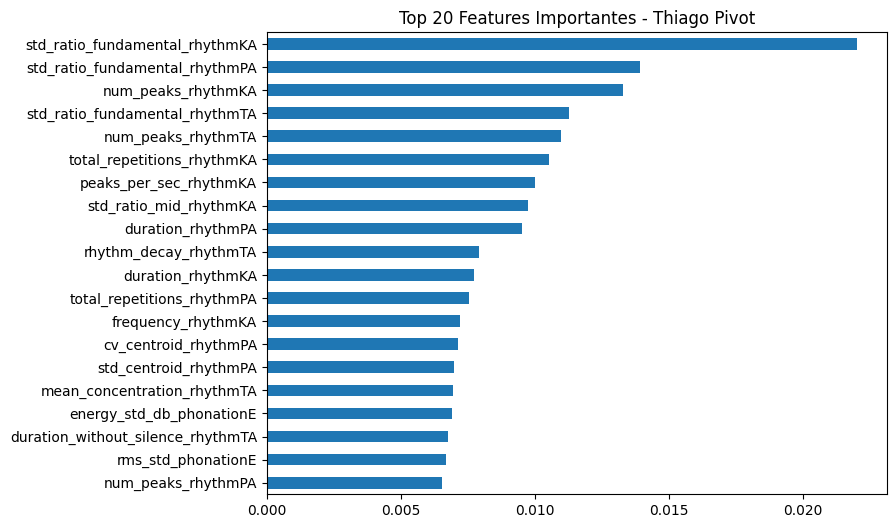

In [29]:
test_ids = [
    "ID007","ID012","ID021","ID029","ID037","ID046","ID051","ID053","ID054","ID056",
    "ID063","ID075","ID083","ID090","ID099","ID101","ID105","ID110","ID116","ID122",
    "ID129","ID136","ID138","ID140","ID158","ID160","ID164","ID171","ID176","ID179",
    "ID202","ID209","ID227","ID229","ID233","ID245","ID252","ID253","ID260","ID261",
    "ID263","ID264","ID269","ID270","ID274","ID278","ID284","ID286","ID290","ID302",
    "ID306","ID323","ID329"
]

train_file_path = r'C:\Users\joaov_zm1q2wh\python\icassp_challenge\data\task1\features\train\features_thiago_pivot.csv'

rf_params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_leaf': 5,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

META_COLUMNS = ['ID', 'Class']

print(f'\n# Carregando dataset...')
df = pd.read_csv(train_file_path)

if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

df = df.dropna(axis=1, how='all')

def try_parse_array(x):
    try:
        val = literal_eval(x) if isinstance(x, str) and x.startswith('[') else x
        if isinstance(val, (list, tuple, np.ndarray)):
            return np.mean(val)
        return val
    except Exception:
        return x

for col in df.columns:
    if df[col].astype(str).str.startswith('[').any():
        print(f'Convertendo coluna com arrays: {col}')
        df[col] = df[col].apply(try_parse_array)

df['ID'] = df['ID'].astype(str)

df_test = df[df['ID'].isin(test_ids)].copy()
df_train = df[~df['ID'].isin(test_ids)].copy()

print(f"Total treino: {len(df_train)} | teste: {len(df_test)}")

X_train_orig = df_train.drop(columns=META_COLUMNS)
y_train = df_train['Class']

X_test_orig = df_test.drop(columns=META_COLUMNS)
y_test = df_test['Class']

X_train_orig = X_train_orig.select_dtypes(include=[np.number])
X_test_orig = X_test_orig[X_train_orig.columns]

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train_orig)
X_test_processed = scaler.transform(X_test_orig)

rf = RandomForestClassifier(**rf_params)
rf.fit(X_train_processed, y_train)

y_test_pred = rf.predict(X_test_processed)
acc_test = accuracy_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

print('-' * 40)
print(f'Accuracy - Teste: {acc_test:.4f}')
print(f'F1-Score - Teste: {f1_test:.4f}')
print('-' * 40)

cm = confusion_matrix(y_test, y_test_pred)
labels = sorted(y_test.unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title(f'Confusion Matrix - Thiago Pivot (IDs fixos)')
plt.show()

importances = pd.Series(rf.feature_importances_, index=X_train_orig.columns)
plt.figure(figsize=(8, 6))
importances.nlargest(20).sort_values().plot(kind='barh')
plt.title('Top 20 Features Importantes - Thiago Pivot')
plt.show()